In [54]:
import os
import sys

import numpy as np

PROJECT_PATH = os.path.abspath(
    os.path.join(os.path.dirname('__file__'), '..'))
sys.path.append(PROJECT_PATH)

from parameters import general_keys
from parameters import loader_keys
from modules.data_loaders.hits_outlier_loader import HiTSOutlierLoader
from modules.data_loaders.ztf_small_outlier_loader import ZTFSmallOutlierLoader
import matplotlib.pyplot as plt
from modules.geometric_transform import transformations_tf
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [80]:
import time

start_time = time.time()
params = {
  loader_keys.DATA_PATH: os.path.join(
      PROJECT_PATH, '../datasets/HiTS2013_300k_samples.pkl'),
  loader_keys.N_SAMPLES_BY_CLASS: 10000,
  loader_keys.TEST_PERCENTAGE: 0.2,
  loader_keys.VAL_SET_INLIER_PERCENTAGE: 0.1,
  loader_keys.USED_CHANNELS: [0, 1, 2, 3],
  loader_keys.CROP_SIZE: 21,
  general_keys.RANDOM_SEED: 42,
  loader_keys.TRANSFORMATION_INLIER_CLASS_VALUE: 1
}
hits_outlier_dataset = HiTSOutlierLoader(params)

dataset = hits_outlier_dataset.get_unsplitted_dataset()
print('dataset: ', np.unique(dataset.data_label, return_counts=True))
(X_train, y_train), (X_val, y_val), (
  X_test, y_test) = hits_outlier_dataset.get_outlier_detection_datasets()

dataset:  (array([0, 1], dtype=int32), array([10000, 10000]))


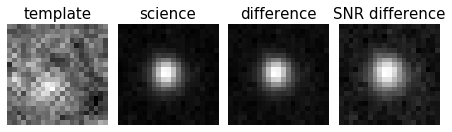

In [81]:
def plot_input_image_ind(image,i):
    #fill titles with blanks
    titles = ['template%i'%i, 'science', 'difference', 'SNR difference']
    n_channels = image.shape[-1]
    for i in range(n_channels):
        plt.subplot(1, n_channels, i+1)
        plt.imshow(image[:,:,i], interpolation='nearest', cmap='gray')
        plt.axis('off')
        plt.title(titles[i])
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0.1)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    # plt.savefig(os.path.join(PROJECT_PATH,'figure_creation/figs/image1.svg'),
    #             format='svg', dpi=600, bbox_inches = 'tight', pad_inches = 0,
    #             transparent=True)
    plt.show()


def plot_input_image(image, name):
    #fill titles with blanks
    titles = ['template', 'science', 'difference', 'SNR difference']
    n_channels = image.shape[-1]
    for i in range(n_channels):
        plt.subplot(1, n_channels, i+1)
        plt.imshow(image[:,:,i], interpolation='nearest', cmap='gray')
        plt.axis('off')
        plt.title(titles[i], fontdict = {'fontsize' : 15})
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0.1)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(os.path.join(PROJECT_PATH,'figure_creation/figs/%s.svg' % name),
                format='svg', dpi=600, bbox_inches = 'tight', pad_inches = 0,
                transparent=True)
    plt.show()

# for i in range(100):
#   plot_input_image(X_train[i], i)
plot_input_image(X_train[68], name='real_hits')

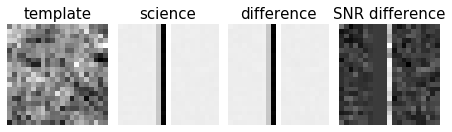

In [82]:

# for i in range(100):
#   plot_input_image_ind(X_test[-i], i)
plot_input_image(X_test[-82], name='bogus_hits')

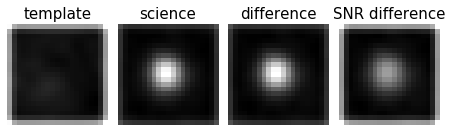

In [83]:
gauss_trf = transformations_tf.KernelTransformer()
trf_list = [(0,0,0,0,1,0)]
gauss_trf.set_transformations_to_perform(trf_list)
transformed_samples = gauss_trf.apply_transforms(X_train[68][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='real_hits_gauss')

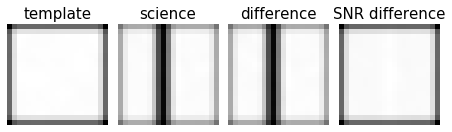

In [84]:
index = -82
transformed_samples = gauss_trf.apply_transforms(X_test[index][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='bogus_hits_gauss')

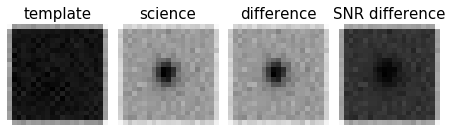

In [85]:
laplace_trf = transformations_tf.KernelTransformer()
trf_list = [(0,0,0,0,0,1)]
laplace_trf.set_transformations_to_perform(trf_list)
transformed_samples = laplace_trf.apply_transforms(X_train[68][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='real_hits_laplace')

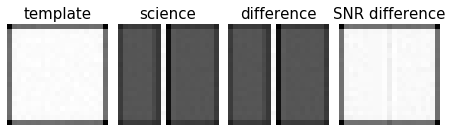

In [86]:
index = -82
transformed_samples = laplace_trf.apply_transforms(X_test[index][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='bogus_hits_laplace')

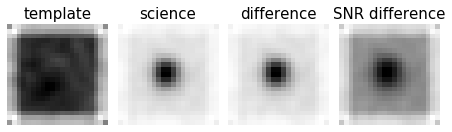

In [87]:
both_trf = transformations_tf.KernelTransformer()
trf_list = [(0,0,0,0,1,1)]
both_trf.set_transformations_to_perform(trf_list)
transformed_samples = both_trf.apply_transforms(X_train[68][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='real_hits_both_filter')

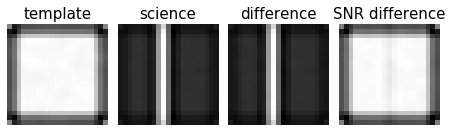

In [88]:
index = -82
transformed_samples = both_trf.apply_transforms(X_test[index][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='bogus_hits_both_filter')



In [89]:
ztf_params = {
  loader_keys.DATA_PATH: os.path.join(
      PROJECT_PATH, '../datasets/ALeRCE_data/new_small_od_dataset_tuples.pkl'),
}
ztf_loader = ZTFSmallOutlierLoader(ztf_params)
(X_train, y_train), (X_val, y_val), (
  X_test, y_test) = ztf_loader.get_outlier_detection_datasets()

In [90]:
def plot_input_image_ind(image,i):
    #fill titles with blanks
    titles = ['template%i'%i, 'science', 'difference', 'SNR difference']
    n_channels = image.shape[-1]
    for i in range(n_channels):
        plt.subplot(1, n_channels, i+1)
        if i == 0:
          indx = 1
        elif i == 1:
          indx = 0
        else:
          indx = i
        plt.imshow(image[:,:,indx], interpolation='nearest')
        plt.axis('off')
        plt.title(titles[i])
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0.1)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    # plt.savefig(os.path.join(PROJECT_PATH,'figure_creation/figs/image1.svg'),
    #             format='svg', dpi=600, bbox_inches = 'tight', pad_inches = 0,
    #             transparent=True)
    plt.show()


def plot_input_image(image, name):
    #fill titles with blanks
    titles = ['template', 'science', 'difference', 'SNR difference']
    n_channels = image.shape[-1]
    for i in range(n_channels):
        plt.subplot(1, 4, i+1)
        if i == 0:
          indx = 1
        elif i == 1:
          indx = 0
        else:
          indx = i
        plt.imshow(image[:,:,indx], interpolation='nearest')
        plt.axis('off')
        plt.title(titles[i], fontdict = {'fontsize' : 15})
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0.1)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(os.path.join(PROJECT_PATH,'figure_creation/figs/%s.svg' % name),
                format='svg', dpi=600, bbox_inches = 'tight', pad_inches = 0,
                transparent=True)
    plt.show()

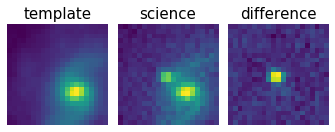

In [91]:
# for i in range(50):
#   plot_input_image_ind(X_test[i], i)
  
plot_input_image(X_test[37], name='real_ztf')

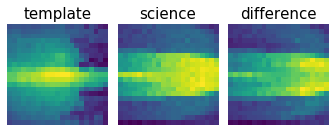

In [92]:

# for i in range(50):
#   plot_input_image_ind(X_test[-i], i)
plot_input_image(X_test[-24], name='bogus_ztf')

In [93]:
# for i in range(50):
#  plot_input_image_ind(X_test[50+i], 50+i)

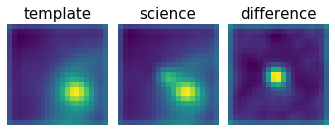

In [94]:
index = 37
transformed_samples = gauss_trf.apply_transforms(X_test[index][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='real_ztf_gauss')

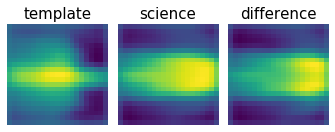

In [95]:
index = -24
transformed_samples = gauss_trf.apply_transforms(X_test[index][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='bogus_ztf_gauss')

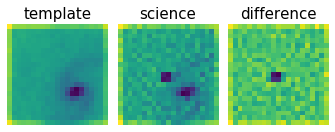

In [96]:
index = 37
transformed_samples = laplace_trf.apply_transforms(X_test[index][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='real_ztf_laplace')

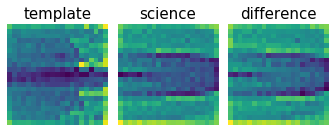

In [97]:
index = -24
transformed_samples = laplace_trf.apply_transforms(X_test[index][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='bogus_ztf_laplace')

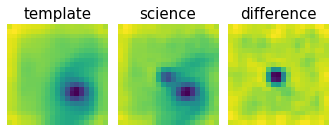

In [98]:
index = 37
transformed_samples = both_trf.apply_transforms(X_test[index][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='real_hits_both_filter')

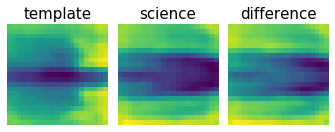

In [99]:
index = -24
transformed_samples = both_trf.apply_transforms(X_test[index][None,...], [0], 1)
plot_input_image(transformed_samples[0][0], name='bogus_hits_both_filter')



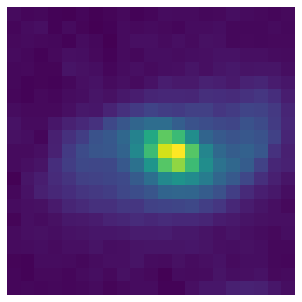

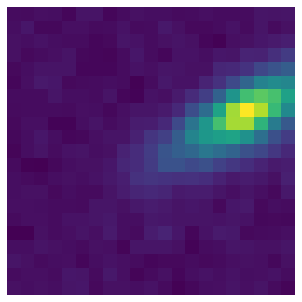

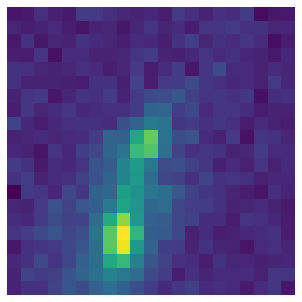

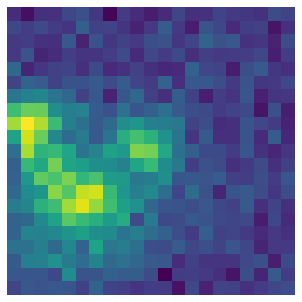

In [ ]:
def plot_input_image(image,c, name):
    #fill titles with blanks
    plt.imshow(image[:,:,c], interpolation='nearest')
    plt.axis('off')
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0.1)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(os.path.join(PROJECT_PATH,'figure_creation/figs/%s.svg' % name),
                format='svg', dpi=600, bbox_inches = 'tight', pad_inches = 0,
                transparent=True)
    plt.show()

plot_input_image(X_test[73], 1, name='single_real_ztf_73')
plot_input_image(X_test[79], 1, name='single_real_ztf_79')
plot_input_image(X_test[94], 0, name='single_real_ztf_94')
plot_input_image(X_test[84], 0, name='single_real_ztf_84')

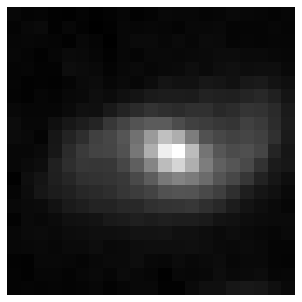

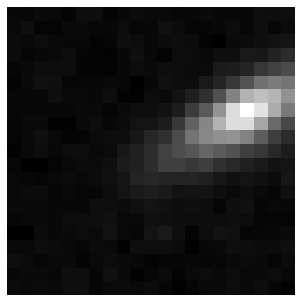

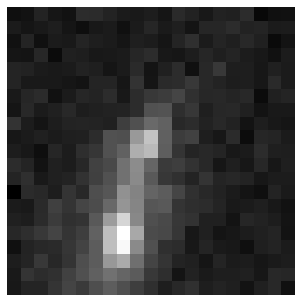

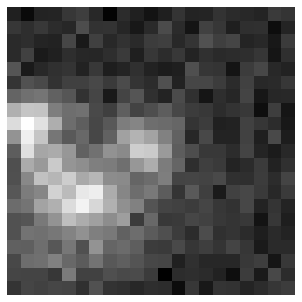

In [52]:
def plot_input_image(image,c, name):
    #fill titles with blanks
    plt.imshow(image[:,:,c], interpolation='nearest', cmap='gray')
    plt.axis('off')
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0.1)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(os.path.join(PROJECT_PATH,'figure_creation/figs/%s.svg' % name),
                format='svg', dpi=600, bbox_inches = 'tight', pad_inches = 0,
                transparent=True)
    plt.show()

plot_input_image(X_test[73], 1, name='single_real_ztf_grey_73')
plot_input_image(X_test[79], 1, name='single_real_ztf_grey_79')
plot_input_image(X_test[94], 0, name='single_real_ztf_grey_94')
plot_input_image(X_test[84], 0, name='single_real_ztf_grey_84')